In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('BC250_2017_Terra_Indigena_A.csv', sep=',')


In [4]:
df.head()

,FID,id_objeto,nome,nomeabrev,geometriaaproximada,perimetrooficial,areaoficialha,grupoetnico,datasituacaojuridica,situacaojuridica,nometi,id_produtor,id_elementoprodutor,codigofunai,geom
0,BC250_2017_Terra_Indigena_A.1,1,Pacheca,Pacheca,Não,28109800.0,185.21,Guarani,2001/1/15,Regularizada,Pacheca,250000,2.0,NaN,MULTIPOLYGON (((-51.817032999999896 -31.170511...
1,BC250_2017_Terra_Indigena_A.2,2,Cantagalo,Cantagalo,Não,885605.0,283.68,Guarani Mbyá,2007/1/11,Homologada ou demarcada,Cantagalo,250000,3.0,NaN,MULTIPOLYGON (((-51.0340119999999 -30.19090999...
2,BC250_2017_Terra_Indigena_A.3,3,Guarani de Águas Brancas,Guarani de Águas Brancas,Não,9000000.0,230.00,Guarani,1996/2/13,Declarada,Guarani de Águas Brancas,250000,4.0,NaN,"MULTIPOLYGON (((-51.60478499999989 -30.766948,..."
3,BC250_2017_Terra_Indigena_A.4,4,Capivari,Capivari,Não,3465950.0,43.32,Guarani Mbyá,2003/1/8,Regularizada,Capivari,250000,7.0,NaN,MULTIPOLYGON (((-50.359660999999896 -30.359487...
4,BC250_2017_Terra_Indigena_A.5,5,Salto Grande do Jacuí,Salto Grande do Jacuí,Não,7258320.0,234.96,Guarani,2002/11/20,Regularizada,Salto Grande do Jacuí,250000,1.0,NaN,MULTIPOLYGON (((-53.2281029999999 -29.07109199...


In [5]:
df.columns

Index(['FID', 'id_objeto', 'nome', 'nomeabrev', 'geometriaaproximada',
       'perimetrooficial', 'areaoficialha', 'grupoetnico',
       'datasituacaojuridica', 'situacaojuridica', 'nometi', 'id_produtor',
       'id_elementoprodutor', 'codigofunai', 'geom'],
      dtype='object')

In [6]:
df = df.rename(columns= {'FID': 'Tabela', 'id_objeto': 'ID_OBJETO', 'nome':'NOME', 'nomeabrev': 'NOME_ABREVIADO', 'geometriaaproximada': 'GEOMETRIA_APROXIMADA',
       'perimetrooficial': 'PERIMETRO_OFICIAL', 'areaoficialha': 'AREA_OFICIAL/HA', 'grupoetnico': 'GRUPO_ETNICO',
       'datasituacaojuridica': 'DATA_SITUACAO_JURIDICA', 'situacaojuridica': 'SITUACAO_JURIDICA', 'nometi': 'NOME_TI', 'id_produtor': 'ID_PRODUTOR',
       'id_elementoprodutor': 'ID_ELEMENTO_PRODUTOR', 'codigofunai': 'CODIGO_FUNAI', 'geom': 'GEOM'})

In [7]:
categoricos = df[['GEOMETRIA_APROXIMADA', 'GRUPO_ETNICO', 'DATA_SITUACAO_JURIDICA', 'SITUACAO_JURIDICA', 'CODIGO_FUNAI']]



In [8]:
def tabulacao_categoricos(df, coluna, dropna= True):

    tabulacao_categoricos = pd.DataFrame(data = df[coluna].value_counts(dropna = dropna)).reset_index().rename(columns = {'index': coluna, coluna:'Frequencia_abs'})
    tabulacao_categoricos['Frequencia_relativa'] = [i/tabulacao_categoricos['Frequencia_abs'].sum() for i in tabulacao_categoricos['Frequencia_abs']]
    var = 0
    feature = []
    for i in tabulacao_categoricos['Frequencia_abs']:
        var += i
        feature.append(var)
    tabulacao_categoricos['Frequencia_acumulada'] = feature
    
    return tabulacao_categoricos

In [28]:
teste = tabulacao_categoricos(df, 'GRUPO_ETNICO', dropna=False)
cauda = teste[teste['Frequencia_abs'] > 1]
cauda

,GRUPO_ETNICO,Frequencia_abs,Frequencia_relativa,Frequencia_acumulada
0,NaN,152,0.351852,152
1,Mura,17,0.039352,169
2,Guarani Kaiowá,12,0.027778,181
3,"Makuxi, Wapixana",10,0.023148,191
4,Makuxi,9,0.020833,200
5,Xavante,8,0.018519,208
6,Terena,8,0.018519,216
7,Paresi,8,0.018519,224
8,Guajajara,8,0.018519,232
9,Guarani,7,0.016204,239


<AxesSubplot:>

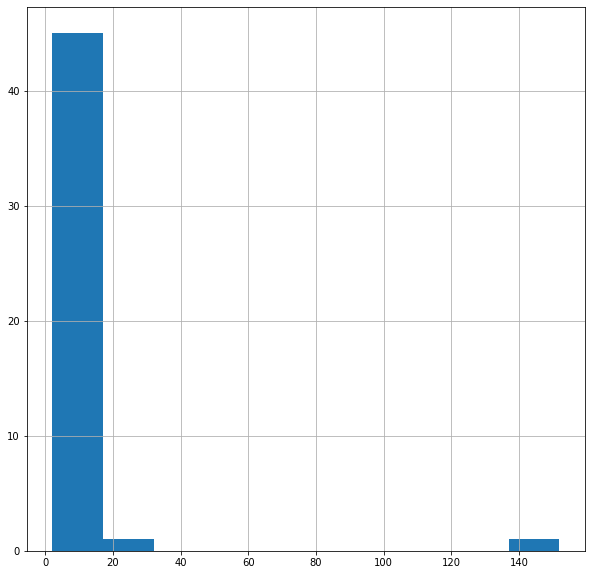

In [31]:
cauda['Frequencia_abs'].hist(figsize=(10,10))

In [12]:
def tabulacao_numericas(df, coluna):
    
    tabulacao = list(df[coluna].dropna())
    tabulacao.sort()
    amplitude = max(tabulacao) - min(tabulacao)
    k = round(np.sqrt(len(tabulacao)),0)
    h = round(amplitude/k)
    limite_inferior = 0
    limite_superior = h
    lista_apoio = []
    while limite_superior <= max(tabulacao):
        slicing = [x for x  in tabulacao if x < limite_superior]
        f_abs = len(slicing)
        intervalo = [limite_inferior, limite_superior, f_abs]
        lista_apoio.append(intervalo)
        limite_inferior = limite_superior
        limite_superior += h
    tabela_analise = pd.DataFrame(data= lista_apoio, columns=['limite_inferior', 'limite_superior', 'frequencia_abs'])
    tabela_analise['frequencia_relativa'] = [i/tabela_analise['frequencia_abs'].sum() for i in tabela_analise['frequencia_abs']]
    var = 0
    feature = []
    for i in tabela_analise['frequencia_abs']:
        var += i
        feature.append(var)
    tabela_analise['frequencia_acumulada'] = feature
    return tabela_analise

In [13]:
teste2 = tabulacao_numericas(df, 'PERIMETRO_OFICIAL')

In [33]:
teste2

,limite_inferior,limite_superior,frequencia_abs,frequencia_relativa,frequencia_acumulada
0,0,3631850,197,0.075740,197
1,3631850,7263700,198,0.076125,395
2,7263700,10895550,199,0.076509,594
3,10895550,14527400,199,0.076509,793
4,14527400,18159250,200,0.076894,993
5,18159250,21791100,200,0.076894,1193
6,21791100,25422950,200,0.076894,1393
7,25422950,29054800,201,0.077278,1594
8,29054800,32686650,201,0.077278,1795
9,32686650,36318500,201,0.077278,1996


In [36]:
teste2.frequencia_abs.mean()

200.07692307692307

<AxesSubplot:>

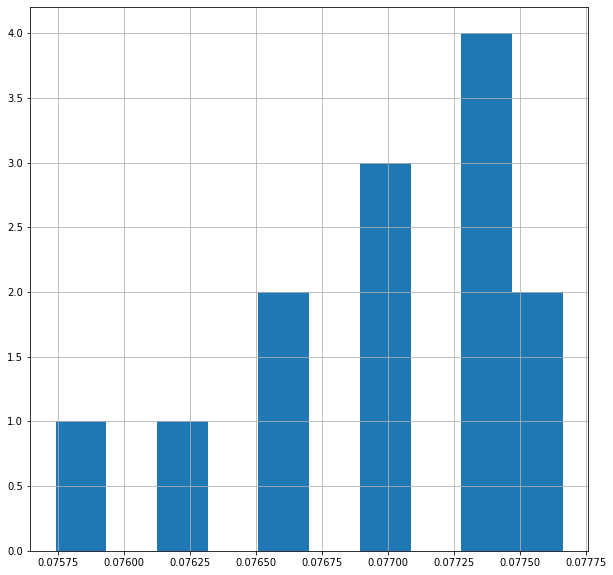

In [35]:
teste2['frequencia_relativa'].hist(figsize=(10,10))

In [16]:
df.count()

Tabela                    432
ID_OBJETO                 432
NOME                      432
NOME_ABREVIADO            428
GEOMETRIA_APROXIMADA      431
PERIMETRO_OFICIAL         203
AREA_OFICIAL/HA           243
GRUPO_ETNICO              280
DATA_SITUACAO_JURIDICA    224
SITUACAO_JURIDICA         431
NOME_TI                   221
ID_PRODUTOR               432
ID_ELEMENTO_PRODUTOR      424
CODIGO_FUNAI                0
GEOM                      432
dtype: int64